In [1]:
# ARC Simulation
from __future__ import division

from platform import python_version
print(python_version())

import math as mh
import argparse
import meep as mp
import time
import numpy as np
import matplotlib.pyplot as plt
from meep.materials import  cSi, SiO2, Si3N4
#from mayavi import mlab


3.9.6
Using MPI version 3.1, 1 processes


In [2]:
sx=10
sy=10
rd = 0.5      #deepth of texture
eps_Si=12
eps_air=1
eps=4
T_Si=2
T_Arc=0.1
dpml = 1.0
cell = mp.Vector3(sx+2*dpml, sy+2*dpml, 0)
pml_layers = [mp.PML(dpml)]
resolution = 200
nfreq = 1000
fcen = 1.75  # pulse center frequency
df = 1.5  # pulse width (in frequency)

In [3]:
#geometry = [mp.Block(mp.Vector3(T_Si, sy, mp.inf), center=mp.Vector3(0, 0), material=mp.Medium(epsilon=eps_Si))]
geometry = [mp.Block(
                     size = mp.Vector3(sx, sy, mp.inf), 
                     center = mp.Vector3(0, 0), 
                     material=mp.Medium(epsilon=eps_air)
                     )
           ]

In [4]:
sources = [mp.Source(
                     mp.GaussianSource(fcen, fwidth=df), 
                     component=mp.Ez, 
                     center=mp.Vector3(1 , 0), 
                     size=mp.Vector3(0, 0.5*sy-2*dpml)
                    )
          ]

-----------
Initializing structure...
time for choose_chunkdivision = 0.000926018 s
Working in 2D dimensions.
Computational cell is 12 x 12 x 0 with resolution 200
     block, center = (0,0,0)
          size (10,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 11.2255 s
-----------


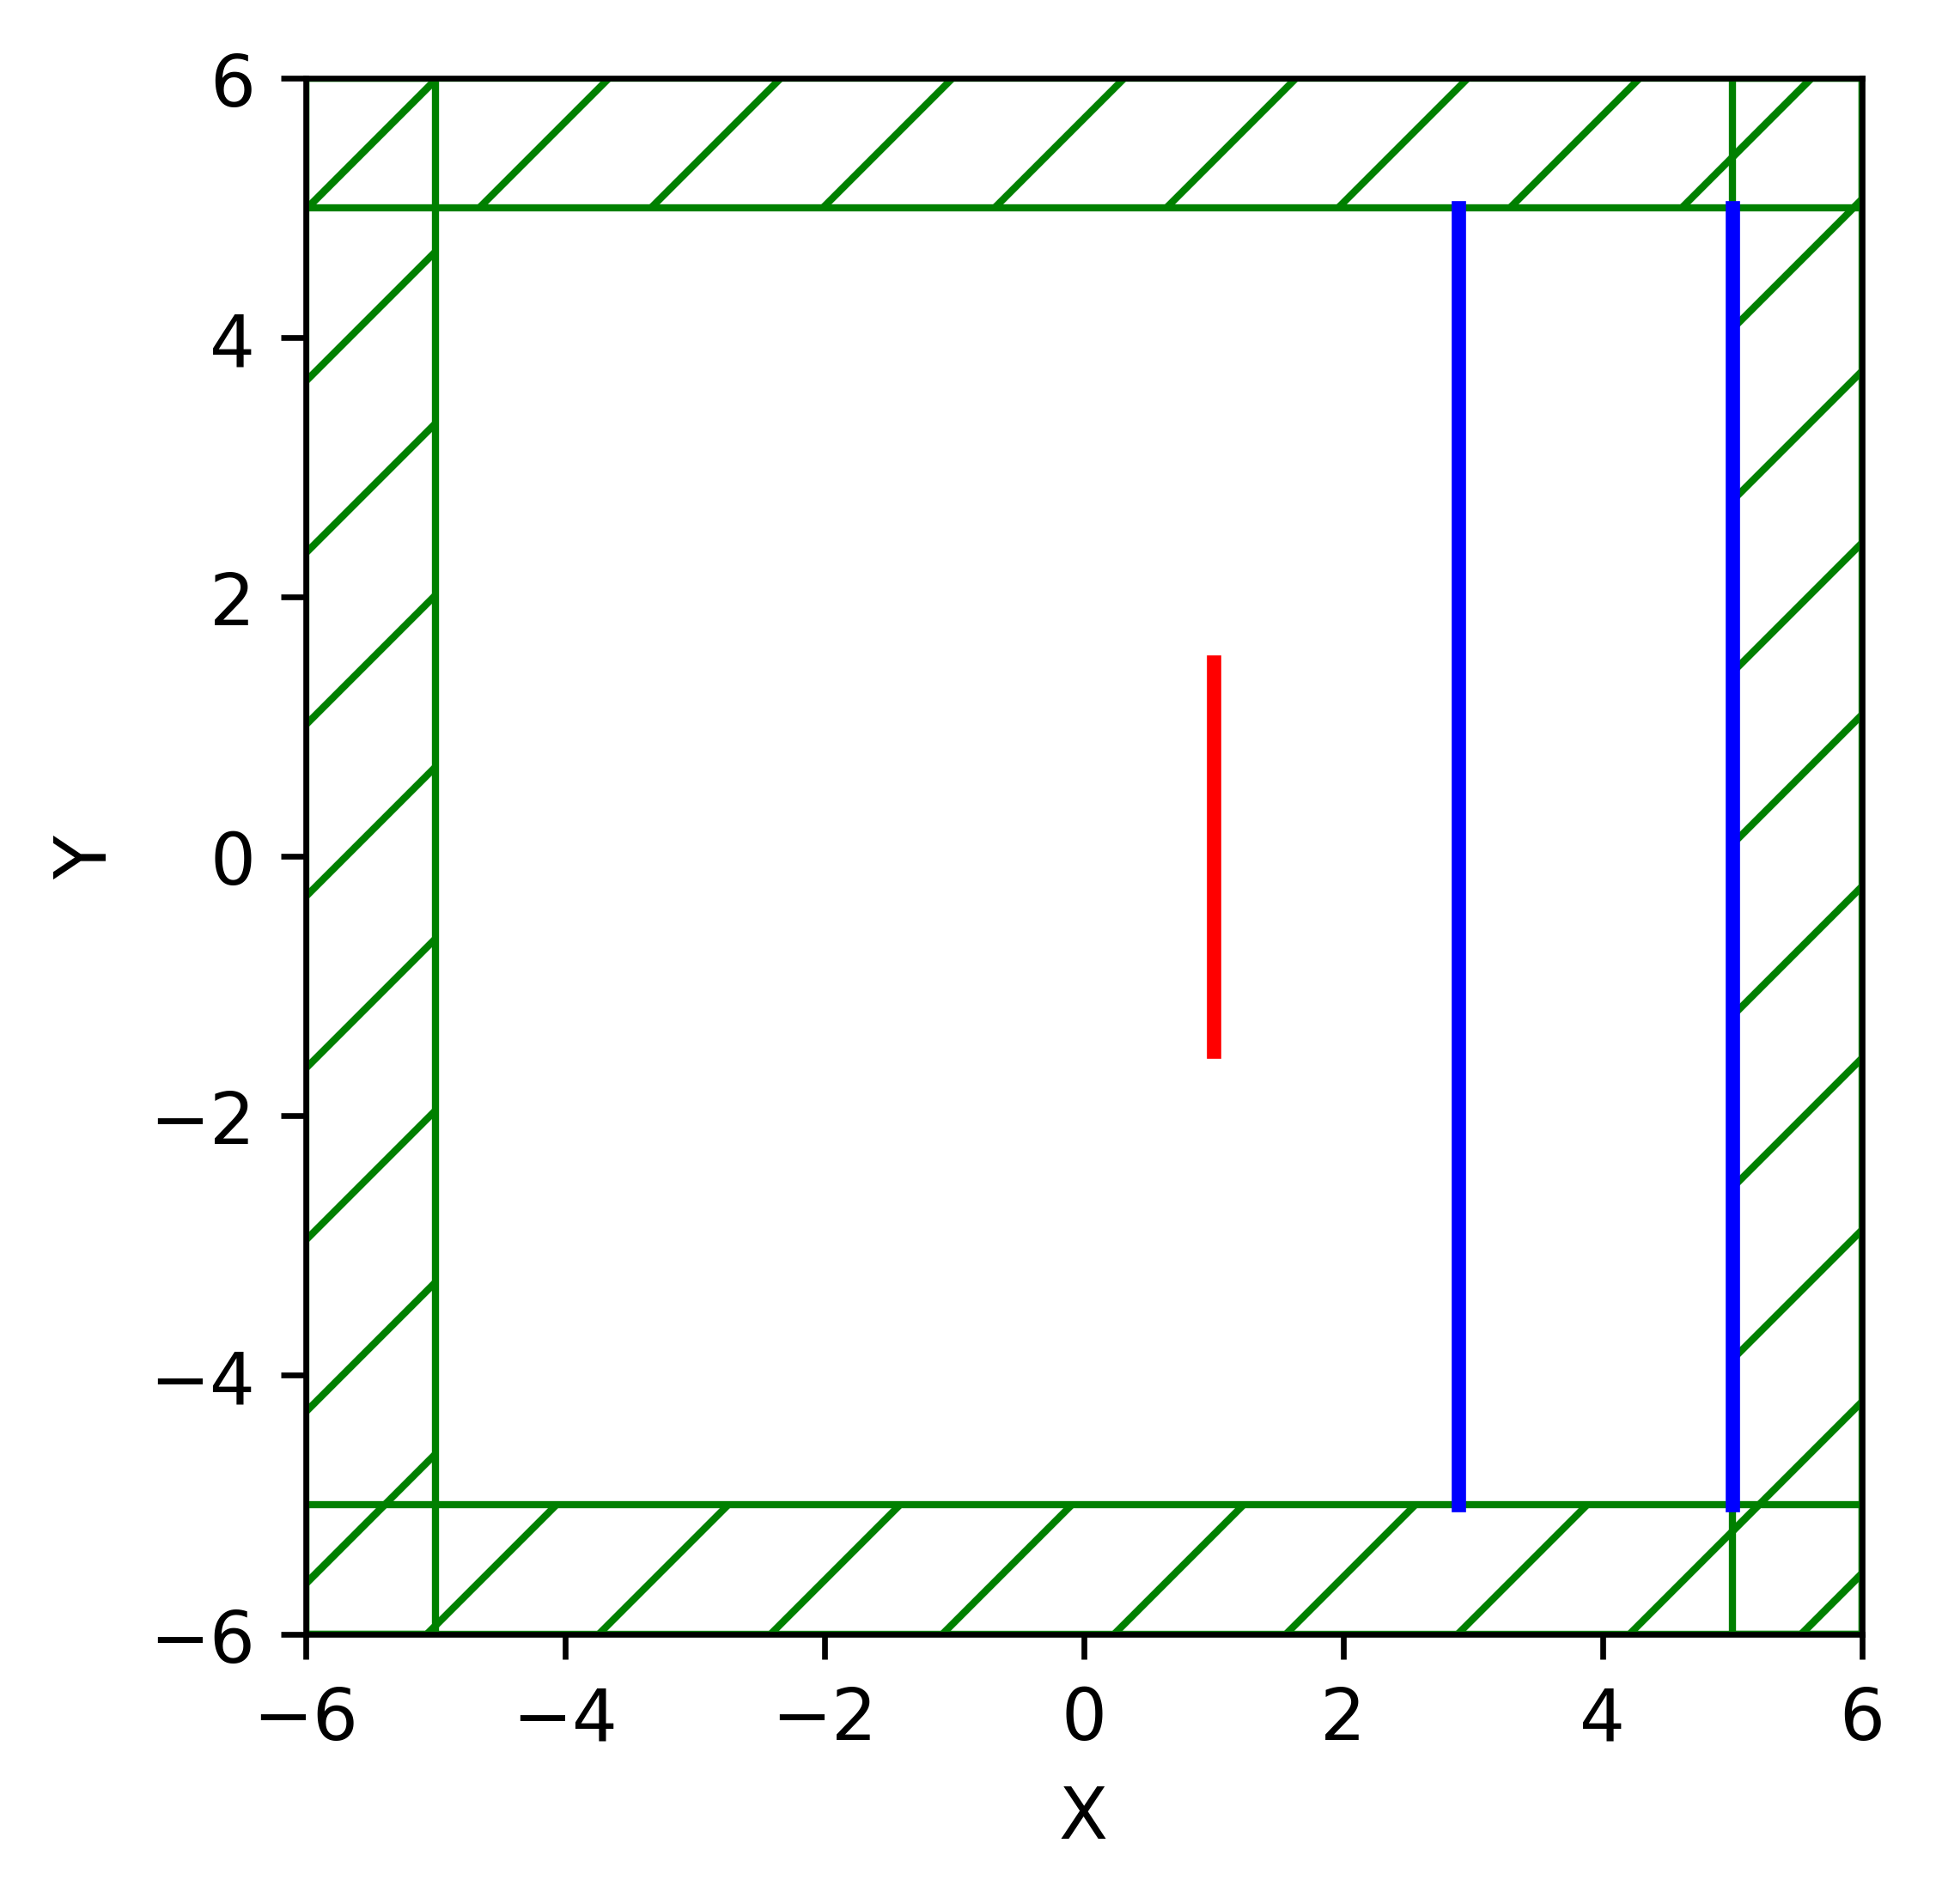

In [5]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

refl_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx-T_Si-1.1*T_Arc, 0), 
                          size=mp.Vector3(0, sy)

                          )

refl_1 = sim.add_flux(
                      fcen, 
                      df, 
                      nfreq, 
                      refl_1_fr
                      )

tran_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx, 0), 
                          size=mp.Vector3(0, sy)
                          )
tran_1 = sim.add_flux(fcen, 
                      df, 
                      nfreq, 
                      tran_1_fr
                      )

plt.figure(dpi=600)
sim.plot2D()
plt.show()

In [6]:
pt = mp.Vector3(0.5*sx-0.1, 0)
sim.run(mp.at_beginning(mp.output_epsilon),
                until_after_sources=mp.stop_when_fields_decayed(50, mp.Ez, pt, 1e-3))
no_ARC_refl_data = sim.get_flux_data(refl_1)

creating output file "./eps-000000000.h5"...
on time step 28 (time=0.07), 0.143599 s/step
on time step 60 (time=0.15), 0.125163 s/step
on time step 93 (time=0.2325), 0.124797 s/step
on time step 124 (time=0.31), 0.129592 s/step
on time step 154 (time=0.385), 0.136311 s/step
on time step 178 (time=0.445), 0.167745 s/step
on time step 202 (time=0.505), 0.168305 s/step
on time step 226 (time=0.565), 0.168709 s/step
on time step 250 (time=0.625), 0.169104 s/step
on time step 273 (time=0.6825), 0.175635 s/step
on time step 291 (time=0.7275), 0.228045 s/step
on time step 310 (time=0.775), 0.216487 s/step
on time step 328 (time=0.82), 0.223769 s/step
on time step 346 (time=0.865), 0.224378 s/step
on time step 365 (time=0.9125), 0.214954 s/step
on time step 386 (time=0.965), 0.197666 s/step
on time step 406 (time=1.015), 0.204678 s/step
on time step 425 (time=1.0625), 0.211293 s/step
on time step 444 (time=1.11), 0.212001 s/step
on time step 463 (time=1.1575), 0.213028 s/step
on time step 482 

on time step 3298 (time=8.245), 0.22326 s/step
on time step 3313 (time=8.2825), 0.268473 s/step
on time step 3329 (time=8.3225), 0.253959 s/step
on time step 3348 (time=8.37), 0.220602 s/step
on time step 3367 (time=8.4175), 0.218535 s/step
on time step 3386 (time=8.465), 0.215264 s/step
on time step 3405 (time=8.5125), 0.217454 s/step
on time step 3424 (time=8.56), 0.220346 s/step
on time step 3443 (time=8.6075), 0.218147 s/step
on time step 3462 (time=8.655), 0.217585 s/step
on time step 3481 (time=8.7025), 0.216427 s/step
on time step 3500 (time=8.75), 0.21816 s/step
on time step 3519 (time=8.7975), 0.218544 s/step
on time step 3538 (time=8.845), 0.21826 s/step
on time step 3557 (time=8.8925), 0.219808 s/step
on time step 3576 (time=8.94), 0.218092 s/step
on time step 3595 (time=8.9875), 0.215907 s/step
on time step 3614 (time=9.035), 0.217974 s/step
on time step 3633 (time=9.0825), 0.217696 s/step
on time step 3652 (time=9.13), 0.220925 s/step
on time step 3671 (time=9.1775), 0.218

on time step 6457 (time=16.1425), 0.218277 s/step
on time step 6476 (time=16.19), 0.216185 s/step
on time step 6495 (time=16.2375), 0.215951 s/step
on time step 6514 (time=16.285), 0.216211 s/step
on time step 6533 (time=16.3325), 0.215109 s/step
on time step 6552 (time=16.38), 0.216707 s/step
on time step 6571 (time=16.4275), 0.215624 s/step
on time step 6590 (time=16.475), 0.215366 s/step
on time step 6609 (time=16.5225), 0.215944 s/step
on time step 6628 (time=16.57), 0.21696 s/step
on time step 6647 (time=16.6175), 0.21756 s/step
on time step 6666 (time=16.665), 0.215466 s/step
on time step 6685 (time=16.7125), 0.215449 s/step
on time step 6704 (time=16.76), 0.216134 s/step
on time step 6723 (time=16.8075), 0.215566 s/step
on time step 6742 (time=16.855), 0.214451 s/step
on time step 6761 (time=16.9025), 0.215606 s/step
on time step 6780 (time=16.95), 0.215996 s/step
on time step 6799 (time=16.9975), 0.216429 s/step
on time step 6818 (time=17.045), 0.215518 s/step
on time step 6837

on time step 9631 (time=24.0775), 0.215555 s/step
on time step 9650 (time=24.125), 0.215242 s/step
on time step 9669 (time=24.1725), 0.215038 s/step
on time step 9688 (time=24.22), 0.215469 s/step
on time step 9707 (time=24.2675), 0.212901 s/step
on time step 9726 (time=24.315), 0.215503 s/step
on time step 9745 (time=24.3625), 0.216554 s/step
on time step 9764 (time=24.41), 0.216682 s/step
on time step 9783 (time=24.4575), 0.214278 s/step
on time step 9802 (time=24.505), 0.215185 s/step
on time step 9821 (time=24.5525), 0.214681 s/step
on time step 9840 (time=24.6), 0.214081 s/step
on time step 9859 (time=24.6475), 0.213403 s/step
on time step 9878 (time=24.695), 0.214438 s/step
on time step 9897 (time=24.7425), 0.216976 s/step
on time step 9916 (time=24.79), 0.215176 s/step
on time step 9935 (time=24.8375), 0.217276 s/step
on time step 9954 (time=24.885), 0.214171 s/step
on time step 9973 (time=24.9325), 0.217827 s/step
on time step 9992 (time=24.98), 0.215661 s/step
on time step 100

on time step 12777 (time=31.9425), 0.217475 s/step
on time step 12796 (time=31.99), 0.217952 s/step
on time step 12815 (time=32.0375), 0.215896 s/step
on time step 12834 (time=32.085), 0.21552 s/step
on time step 12853 (time=32.1325), 0.217495 s/step
on time step 12872 (time=32.18), 0.216761 s/step
on time step 12891 (time=32.2275), 0.217089 s/step
on time step 12910 (time=32.275), 0.218884 s/step
on time step 12929 (time=32.3225), 0.217725 s/step
on time step 12948 (time=32.37), 0.218261 s/step
on time step 12967 (time=32.4175), 0.22008 s/step
on time step 12986 (time=32.465), 0.216698 s/step
on time step 13005 (time=32.5125), 0.217887 s/step
on time step 13024 (time=32.56), 0.21995 s/step
on time step 13043 (time=32.6075), 0.217345 s/step
on time step 13062 (time=32.655), 0.216319 s/step
on time step 13081 (time=32.7025), 0.216626 s/step
on time step 13100 (time=32.75), 0.214634 s/step
on time step 13119 (time=32.7975), 0.216031 s/step
on time step 13138 (time=32.845), 0.214286 s/ste

on time step 15879 (time=39.6975), 0.218592 s/step
on time step 15898 (time=39.745), 0.218306 s/step
on time step 15917 (time=39.7925), 0.219575 s/step
on time step 15936 (time=39.84), 0.219051 s/step
on time step 15955 (time=39.8875), 0.21626 s/step
on time step 15974 (time=39.935), 0.21902 s/step
on time step 15993 (time=39.9825), 0.219694 s/step
on time step 16012 (time=40.03), 0.216656 s/step
on time step 16031 (time=40.0775), 0.216586 s/step
on time step 16050 (time=40.125), 0.215543 s/step
on time step 16069 (time=40.1725), 0.217185 s/step
on time step 16088 (time=40.22), 0.216573 s/step
on time step 16107 (time=40.2675), 0.215695 s/step
on time step 16126 (time=40.315), 0.216114 s/step
on time step 16145 (time=40.3625), 0.214584 s/step
on time step 16164 (time=40.41), 0.216115 s/step
on time step 16183 (time=40.4575), 0.218537 s/step
on time step 16202 (time=40.505), 0.217973 s/step
on time step 16221 (time=40.5525), 0.218632 s/step
on time step 16240 (time=40.6), 0.218142 s/ste

on time step 18980 (time=47.45), 0.219268 s/step
on time step 18999 (time=47.4975), 0.218015 s/step
on time step 19018 (time=47.545), 0.219185 s/step
on time step 19037 (time=47.5925), 0.219705 s/step
on time step 19056 (time=47.64), 0.221057 s/step
on time step 19075 (time=47.6875), 0.214538 s/step
on time step 19094 (time=47.735), 0.217712 s/step
on time step 19113 (time=47.7825), 0.219717 s/step
on time step 19132 (time=47.83), 0.218934 s/step
on time step 19151 (time=47.8775), 0.217907 s/step
on time step 19170 (time=47.925), 0.219794 s/step
on time step 19189 (time=47.9725), 0.217919 s/step
on time step 19208 (time=48.02), 0.215605 s/step
on time step 19226 (time=48.065), 0.222854 s/step
on time step 19245 (time=48.1125), 0.218604 s/step
on time step 19264 (time=48.16), 0.217535 s/step
on time step 19283 (time=48.2075), 0.217347 s/step
on time step 19302 (time=48.255), 0.215944 s/step
on time step 19321 (time=48.3025), 0.217332 s/step
on time step 19340 (time=48.35), 0.217928 s/st

on time step 22019 (time=55.0475), 0.224083 s/step
on time step 22037 (time=55.0925), 0.224362 s/step
on time step 22055 (time=55.1375), 0.224245 s/step
on time step 22073 (time=55.1825), 0.225245 s/step
on time step 22091 (time=55.2275), 0.225004 s/step
on time step 22110 (time=55.275), 0.22148 s/step
on time step 22129 (time=55.3225), 0.219011 s/step
on time step 22148 (time=55.37), 0.21898 s/step
on time step 22167 (time=55.4175), 0.217024 s/step
on time step 22185 (time=55.4625), 0.226105 s/step
on time step 22203 (time=55.5075), 0.224002 s/step
on time step 22221 (time=55.5525), 0.224626 s/step
on time step 22239 (time=55.5975), 0.230019 s/step
on time step 22257 (time=55.6425), 0.229208 s/step
on time step 22275 (time=55.6875), 0.228635 s/step
on time step 22293 (time=55.7325), 0.227974 s/step
on time step 22311 (time=55.7775), 0.222913 s/step
on time step 22329 (time=55.8225), 0.22405 s/step
on time step 22347 (time=55.8675), 0.222908 s/step
on time step 22365 (time=55.9125), 0.

on time step 25092 (time=62.73), 0.219216 s/step
on time step 25111 (time=62.7775), 0.217824 s/step
on time step 25130 (time=62.825), 0.216744 s/step
on time step 25149 (time=62.8725), 0.217391 s/step
on time step 25168 (time=62.92), 0.216888 s/step
on time step 25187 (time=62.9675), 0.217324 s/step
on time step 25206 (time=63.015), 0.218143 s/step
on time step 25225 (time=63.0625), 0.219145 s/step
on time step 25244 (time=63.11), 0.221096 s/step
on time step 25263 (time=63.1575), 0.219098 s/step
on time step 25281 (time=63.2025), 0.227565 s/step
on time step 25300 (time=63.25), 0.22079 s/step
on time step 25319 (time=63.2975), 0.218511 s/step
on time step 25338 (time=63.345), 0.218777 s/step
on time step 25357 (time=63.3925), 0.218834 s/step
on time step 25376 (time=63.44), 0.219025 s/step
on time step 25395 (time=63.4875), 0.219662 s/step
on time step 25414 (time=63.535), 0.219381 s/step
on time step 25433 (time=63.5825), 0.21941 s/step
on time step 25452 (time=63.63), 0.216244 s/ste

on time step 28183 (time=70.4575), 0.227444 s/step
on time step 28201 (time=70.5025), 0.229938 s/step
on time step 28220 (time=70.55), 0.217941 s/step
on time step 28239 (time=70.5975), 0.218614 s/step
on time step 28258 (time=70.645), 0.220378 s/step
on time step 28277 (time=70.6925), 0.219521 s/step
on time step 28296 (time=70.74), 0.219459 s/step
on time step 28315 (time=70.7875), 0.217763 s/step
on time step 28334 (time=70.835), 0.21842 s/step
on time step 28353 (time=70.8825), 0.2195 s/step
on time step 28372 (time=70.93), 0.220801 s/step
on time step 28391 (time=70.9775), 0.220714 s/step
on time step 28410 (time=71.025), 0.219624 s/step
on time step 28428 (time=71.07), 0.223991 s/step
on time step 28447 (time=71.1175), 0.219612 s/step
on time step 28466 (time=71.165), 0.219527 s/step
on time step 28485 (time=71.2125), 0.219009 s/step
on time step 28504 (time=71.26), 0.218485 s/step
on time step 28523 (time=71.3075), 0.217924 s/step
on time step 28542 (time=71.355), 0.218456 s/ste

on time step 31295 (time=78.2375), 0.217132 s/step
on time step 31314 (time=78.285), 0.214374 s/step
on time step 31333 (time=78.3325), 0.22065 s/step
on time step 31352 (time=78.38), 0.216639 s/step
on time step 31374 (time=78.435), 0.187477 s/step
on time step 31398 (time=78.495), 0.172475 s/step
on time step 31421 (time=78.5525), 0.174874 s/step
on time step 31444 (time=78.61), 0.174758 s/step
on time step 31468 (time=78.67), 0.172682 s/step
on time step 31492 (time=78.73), 0.173242 s/step
on time step 31515 (time=78.7875), 0.176939 s/step
on time step 31538 (time=78.845), 0.180998 s/step
on time step 31557 (time=78.8925), 0.21691 s/step
on time step 31576 (time=78.94), 0.22077 s/step
on time step 31595 (time=78.9875), 0.220239 s/step
on time step 31614 (time=79.035), 0.221162 s/step
on time step 31633 (time=79.0825), 0.222189 s/step
on time step 31652 (time=79.13), 0.221722 s/step
on time step 31671 (time=79.1775), 0.221567 s/step
on time step 31688 (time=79.22), 0.237596 s/step
on

on time step 34396 (time=85.99), 0.251885 s/step
on time step 34414 (time=86.035), 0.225376 s/step
on time step 34433 (time=86.0825), 0.221269 s/step
on time step 34450 (time=86.125), 0.242704 s/step
on time step 34468 (time=86.17), 0.228987 s/step
on time step 34485 (time=86.2125), 0.239545 s/step
on time step 34503 (time=86.2575), 0.224444 s/step
on time step 34521 (time=86.3025), 0.228923 s/step
on time step 34539 (time=86.3475), 0.222238 s/step
on time step 34558 (time=86.395), 0.222199 s/step
on time step 34577 (time=86.4425), 0.220805 s/step
on time step 34595 (time=86.4875), 0.230257 s/step
on time step 34614 (time=86.535), 0.219607 s/step
on time step 34633 (time=86.5825), 0.220461 s/step
on time step 34652 (time=86.63), 0.220375 s/step
on time step 34671 (time=86.6775), 0.221857 s/step
on time step 34689 (time=86.7225), 0.223675 s/step
on time step 34707 (time=86.7675), 0.226082 s/step
on time step 34725 (time=86.8125), 0.222729 s/step
on time step 34743 (time=86.8575), 0.2229

on time step 37453 (time=93.6325), 0.22129 s/step
on time step 37472 (time=93.68), 0.22089 s/step
on time step 37491 (time=93.7275), 0.219789 s/step
on time step 37510 (time=93.775), 0.221537 s/step
on time step 37529 (time=93.8225), 0.219294 s/step
on time step 37548 (time=93.87), 0.221065 s/step
on time step 37566 (time=93.915), 0.222565 s/step
on time step 37584 (time=93.96), 0.222979 s/step
on time step 37603 (time=94.0075), 0.218863 s/step
on time step 37622 (time=94.055), 0.220064 s/step
on time step 37641 (time=94.1025), 0.21965 s/step
on time step 37660 (time=94.15), 0.218965 s/step
on time step 37679 (time=94.1975), 0.219967 s/step
on time step 37698 (time=94.245), 0.221076 s/step
on time step 37717 (time=94.2925), 0.220758 s/step
on time step 37736 (time=94.34), 0.219753 s/step
on time step 37755 (time=94.3875), 0.220042 s/step
on time step 37774 (time=94.435), 0.219182 s/step
on time step 37793 (time=94.4825), 0.221049 s/step
on time step 37812 (time=94.53), 0.221561 s/step


In [7]:
no_ARC_tran_flux = mp.get_fluxes(tran_1)
no_ARC_refl_flux = mp.get_fluxes(refl_1)
no_ARC_tran_flux = mp.get_fluxes(tran_1)
no_ARC_refl_flux = mp.get_fluxes(refl_1)


no_ARC_ttran_flux = np.asarray(mp.get_fluxes(tran_1))
no_ARC_rrefl_flux = np.asarray(mp.get_fluxes(refl_1))
no_ARC_ttran_flux + no_ARC_rrefl_flux

array([2.75457673e-06, 2.87419445e-06, 2.99875301e-06, 3.12844513e-06,
       3.26347056e-06, 3.40403633e-06, 3.55035698e-06, 3.70265478e-06,
       3.86116003e-06, 4.02611131e-06, 4.19775576e-06, 4.37634938e-06,
       4.56215731e-06, 4.75545409e-06, 4.95652402e-06, 5.16566142e-06,
       5.38317103e-06, 5.60936826e-06, 5.84457964e-06, 6.08914309e-06,
       6.34340834e-06, 6.60773723e-06, 6.88250415e-06, 7.16809645e-06,
       7.46491479e-06, 7.77337365e-06, 8.09390169e-06, 8.42694224e-06,
       8.77295367e-06, 9.13240994e-06, 9.50580104e-06, 9.89363349e-06,
       1.02964309e-05, 1.07147344e-05, 1.11491032e-05, 1.16001154e-05,
       1.20683679e-05, 1.25544775e-05, 1.30590817e-05, 1.35828386e-05,
       1.41264280e-05, 1.46905522e-05, 1.52759361e-05, 1.58833283e-05,
       1.65135016e-05, 1.71672539e-05, 1.78454086e-05, 1.85488158e-05,
       1.92783526e-05, 2.00349241e-05, 2.08194643e-05, 2.16329365e-05,
       2.24763349e-05, 2.33506844e-05, 2.42570426e-05, 2.51965000e-05,
      

-----------
Initializing structure...
time for choose_chunkdivision = 0.00128388 s
Working in 2D dimensions.
Computational cell is 12 x 12 x 0 with resolution 200
     block, center = (4,0,0)
          size (2,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (2.95,0,0)
          size (0.1,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (3.15,4.675,0)
          size (0.5,0.3,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (3.15,4.05,0)
          size (0.5,0.3,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (3.15,3.425,0)
          size (0.5,0.3,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (3.15,2

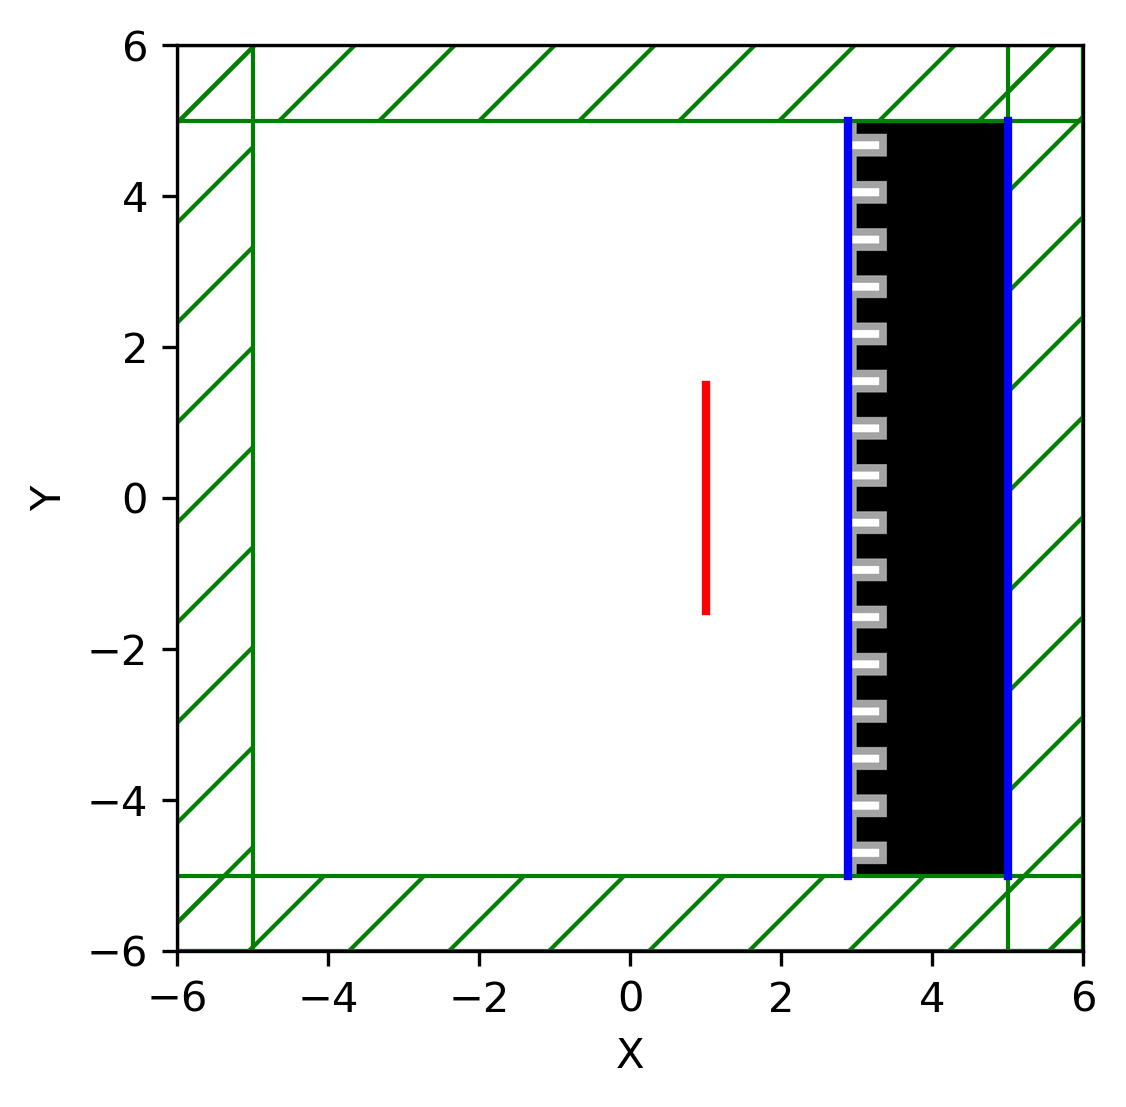

In [8]:
sim.reset_meep()

import math as mh


# Design texture
size_x = 0.4
size_y = 0.3
N = 15
D = (sy)/(N+1)


geometry = [mp.Block(
                    size = mp.Vector3(T_Si, sy, mp.inf), 
                    center = mp.Vector3(0.5*sx-0.5*(T_Si), 0),
                    material = cSi
                     ),
            mp.Block(
                    size=mp.Vector3(T_Arc, sy, mp.inf), 
                    center=mp.Vector3(0.5*sx-0.5*T_Arc-T_Si, 0),
                    material=Si3N4
                     )
           ]

for i in range(N, -1, -1):
            geometry.append( 
                   mp.Block(
                            size = mp.Vector3(size_x+T_Arc, size_y, mp.inf),
                            center = (0.5*sx-(T_Si+T_Arc)+0.5*(size_x+T_Arc),
                                      -0.5*sy+size_y+D*i), 
                            material = Si3N4,
                            )
                            )
        
for i in range(N, -1, -1):
            geometry.append( 
                   mp.Block(
                            size = mp.Vector3(size_x, size_y-2*T_Arc, mp.inf),
                            center = (0.5*sx-(T_Si+T_Arc)+0.5*(size_x), -0.5*sy+size_y+D*i), 
                            material = mp.Medium(epsilon=eps_air),
                            )
                            )
        
geometry.append( 
            mp.Block(
                    size = mp.Vector3(2*T_Arc, sy, mp.inf),
                    center = (0.5*sx-(T_Si+T_Arc)-T_Arc, 0), 
                      material = mp.Medium(epsilon=eps_air),
                     )
                ) 
'''
for i in range(N, -1, -1):
            geometry.append( 
                   mp.Block(
                            size = mp.Vector3(T_Arc, size_y, mp.inf),
                            center = (0.5*sx-(T_Si+T_Arc-size_x)-0.5*T_Arc, (-0.5*sy+size_y+D*i)), 
                            material = Si3N4,
                            )
                            )

#for i in np.arange(N+.5, -.5, -.5) and j in np.arange(2*N+1, -1 , -1):
for i, j in zip(np.arange(N+.5, -.5, -.5), np.arange(2*N+1, -1 , -1)):
            geometry.append( 
                   mp.Block(
                            size = mp.Vector3(size_x, T_Arc, mp.inf),
                            center = (0.5*sx-(T_Si+T_Arc-size_x)-0.5*size_x, (-0.5*sy+0.5*size_y+D*i)+((-1)**j)*0.49999*T_Arc), 
                            material = Si3N4,
                            )
                            )
'''        
sim = mp.Simulation(
                    cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution
                    )

#refl_1_fr = mp.FluxRegion(
#                          center=mp.Vector3(0.5*sx-dpml-0.5*T_Si-1.1*T_Arc, 0),
#                          size=mp.Vector3(0, sy)
#                          )

refl_1 = sim.add_flux(fcen, df, nfreq, refl_1_fr)

tran_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx, 0), 
                          size=mp.Vector3(0, sy)
                          )
tran_1 = sim.add_flux(fcen, 
                      df, 
                      nfreq, 
                      tran_1_fr 
                      )

sim.load_minus_flux_data(refl_1, no_ARC_refl_data)

plt.figure(dpi=300)
sim.plot2D()
plt.show()


In [ ]:
pt = mp.Vector3(0.5*sx-0.1, 0)
sim.run(mp.at_beginning(mp.output_epsilon),
                until_after_sources=mp.stop_when_fields_decayed(20, mp.Ez, pt, 1e-3))

with_ARC_refl_flux = mp.get_fluxes(refl_1)
with_ARC_tran_flux = mp.get_fluxes(tran_1)

flux_freqs = mp.get_flux_freqs(refl_1)

creating output file "./eps-000000000.h5"...


/opt/anaconda/anaconda3/envs/pmp/lib/python3.9/site-packages/meep/simulation.py:1330: RuntimeWarning: Note: your sources include frequencies outside the range of validity of the material models. This is fine as long as you eventually only look at outputs (fluxes, resonant modes, etc.) at valid frequencies.
  warnings.warn(warn_src, RuntimeWarning)
/opt/anaconda/anaconda3/envs/pmp/lib/python3.9/site-packages/meep/simulation.py:1334: RuntimeWarning: DFT frequency 1.0 is out of material's range of 1.2048192771084338-2.5
  warnings.warn(warn_dft_fmt.format(dftf, min_freq, max_freq), RuntimeWarning)


on time step 8 (time=0.02), 0.504005 s/step
on time step 19 (time=0.0475), 0.397124 s/step
on time step 30 (time=0.075), 0.397284 s/step
on time step 40 (time=0.1), 0.401561 s/step
on time step 50 (time=0.125), 0.402885 s/step
on time step 60 (time=0.15), 0.413702 s/step
on time step 69 (time=0.1725), 0.478871 s/step
on time step 77 (time=0.1925), 0.501375 s/step
on time step 86 (time=0.215), 0.497793 s/step
on time step 94 (time=0.235), 0.501651 s/step
on time step 102 (time=0.255), 0.502648 s/step
on time step 111 (time=0.2775), 0.496999 s/step
on time step 120 (time=0.3), 0.508848 s/step
on time step 128 (time=0.32), 0.501709 s/step
on time step 136 (time=0.34), 0.501161 s/step
on time step 144 (time=0.36), 0.501062 s/step
on time step 153 (time=0.3825), 0.498389 s/step
on time step 162 (time=0.405), 0.49839 s/step
on time step 170 (time=0.425), 0.501247 s/step
on time step 178 (time=0.445), 0.507288 s/step
on time step 187 (time=0.4675), 0.497799 s/step
on time step 195 (time=0.487

on time step 1464 (time=3.66), 0.50617 s/step
on time step 1472 (time=3.68), 0.507109 s/step
on time step 1480 (time=3.7), 0.505549 s/step
on time step 1488 (time=3.72), 0.507555 s/step
on time step 1496 (time=3.74), 0.512143 s/step
on time step 1504 (time=3.76), 0.509621 s/step
on time step 1512 (time=3.78), 0.509987 s/step
on time step 1520 (time=3.8), 0.506459 s/step
on time step 1528 (time=3.82), 0.506102 s/step
on time step 1536 (time=3.84), 0.507151 s/step
on time step 1544 (time=3.86), 0.522602 s/step
on time step 1552 (time=3.88), 0.509392 s/step
on time step 1560 (time=3.9), 0.507808 s/step
on time step 1568 (time=3.92), 0.509601 s/step
on time step 1576 (time=3.94), 0.505969 s/step
on time step 1584 (time=3.96), 0.507899 s/step
on time step 1592 (time=3.98), 0.508431 s/step
on time step 1600 (time=4), 0.507161 s/step
on time step 1608 (time=4.02), 0.502485 s/step
on time step 1616 (time=4.04), 0.50729 s/step
on time step 1624 (time=4.06), 0.507357 s/step
on time step 1632 (ti

on time step 2866 (time=7.165), 0.497545 s/step
on time step 2874 (time=7.185), 0.503486 s/step
on time step 2883 (time=7.2075), 0.497539 s/step
on time step 2892 (time=7.23), 0.498567 s/step
on time step 2900 (time=7.25), 0.501806 s/step
on time step 2909 (time=7.2725), 0.498383 s/step
on time step 2917 (time=7.2925), 0.500113 s/step
on time step 2925 (time=7.3125), 0.501983 s/step
on time step 2934 (time=7.335), 0.498575 s/step
on time step 2942 (time=7.355), 0.500567 s/step
on time step 2951 (time=7.3775), 0.49588 s/step
on time step 2960 (time=7.4), 0.498305 s/step
on time step 2969 (time=7.4225), 0.498508 s/step
on time step 2978 (time=7.445), 0.499513 s/step
on time step 2986 (time=7.465), 0.500514 s/step
on time step 2994 (time=7.485), 0.50358 s/step
on time step 3002 (time=7.505), 0.50017 s/step
on time step 3010 (time=7.525), 0.501448 s/step
on time step 3018 (time=7.545), 0.501043 s/step
on time step 3026 (time=7.565), 0.503004 s/step
on time step 3034 (time=7.585), 0.502591 

on time step 4292 (time=10.73), 0.498243 s/step
on time step 4301 (time=10.7525), 0.498755 s/step
on time step 4310 (time=10.775), 0.497942 s/step
on time step 4319 (time=10.7975), 0.497569 s/step
on time step 4328 (time=10.82), 0.497272 s/step
on time step 4336 (time=10.84), 0.504625 s/step
on time step 4344 (time=10.86), 0.503453 s/step
on time step 4352 (time=10.88), 0.501004 s/step
on time step 4360 (time=10.9), 0.502518 s/step
on time step 4368 (time=10.92), 0.505387 s/step
on time step 4376 (time=10.94), 0.503689 s/step
on time step 4384 (time=10.96), 0.502038 s/step
on time step 4392 (time=10.98), 0.505425 s/step
on time step 4400 (time=11), 0.502153 s/step
on time step 4408 (time=11.02), 0.503333 s/step
on time step 4416 (time=11.04), 0.502998 s/step
on time step 4424 (time=11.06), 0.503417 s/step
on time step 4432 (time=11.08), 0.502911 s/step
on time step 4440 (time=11.1), 0.502333 s/step
on time step 4448 (time=11.12), 0.528925 s/step
on time step 4456 (time=11.14), 0.517908

on time step 5694 (time=14.235), 0.500996 s/step
on time step 5702 (time=14.255), 0.502586 s/step
on time step 5711 (time=14.2775), 0.500207 s/step
on time step 5720 (time=14.3), 0.499266 s/step
on time step 5728 (time=14.32), 0.518253 s/step
on time step 5736 (time=14.34), 0.506578 s/step
on time step 5744 (time=14.36), 0.502541 s/step
on time step 5752 (time=14.38), 0.503935 s/step
on time step 5760 (time=14.4), 0.503394 s/step
on time step 5768 (time=14.42), 0.502457 s/step
on time step 5776 (time=14.44), 0.507353 s/step
on time step 5784 (time=14.46), 0.504223 s/step
on time step 5792 (time=14.48), 0.503654 s/step
on time step 5800 (time=14.5), 0.505011 s/step
on time step 5808 (time=14.52), 0.503018 s/step
on time step 5816 (time=14.54), 0.504787 s/step
on time step 5824 (time=14.56), 0.509982 s/step
on time step 5832 (time=14.58), 0.518125 s/step
on time step 5840 (time=14.6), 0.518481 s/step
on time step 5848 (time=14.62), 0.506006 s/step
on time step 5856 (time=14.64), 0.520491

on time step 7082 (time=17.705), 0.501112 s/step
on time step 7091 (time=17.7275), 0.491889 s/step
on time step 7100 (time=17.75), 0.497327 s/step
on time step 7109 (time=17.7725), 0.498501 s/step
on time step 7118 (time=17.795), 0.497988 s/step
on time step 7127 (time=17.8175), 0.497037 s/step
on time step 7135 (time=17.8375), 0.502405 s/step
on time step 7144 (time=17.86), 0.49922 s/step
on time step 7152 (time=17.88), 0.500805 s/step
on time step 7161 (time=17.9025), 0.500012 s/step
on time step 7170 (time=17.925), 0.498034 s/step
on time step 7178 (time=17.945), 0.500864 s/step
on time step 7186 (time=17.965), 0.501524 s/step
on time step 7194 (time=17.985), 0.500612 s/step
on time step 7202 (time=18.005), 0.503585 s/step
on time step 7210 (time=18.025), 0.500297 s/step
on time step 7218 (time=18.045), 0.519258 s/step
on time step 7226 (time=18.065), 0.510954 s/step
on time step 7234 (time=18.085), 0.505637 s/step
on time step 7242 (time=18.105), 0.504832 s/step
on time step 7250 (

on time step 8734 (time=21.835), 0.392973 s/step
on time step 8745 (time=21.8625), 0.396903 s/step
on time step 8756 (time=21.89), 0.398235 s/step
on time step 8767 (time=21.9175), 0.398049 s/step
on time step 8777 (time=21.9425), 0.406894 s/step
on time step 8787 (time=21.9675), 0.406206 s/step
on time step 8798 (time=21.995), 0.39466 s/step
on time step 8808 (time=22.02), 0.402262 s/step
on time step 8818 (time=22.045), 0.406172 s/step
on time step 8828 (time=22.07), 0.404906 s/step
on time step 8838 (time=22.095), 0.407817 s/step
on time step 8848 (time=22.12), 0.402857 s/step
on time step 8858 (time=22.145), 0.408963 s/step
on time step 8869 (time=22.1725), 0.39621 s/step
on time step 8880 (time=22.2), 0.389624 s/step
on time step 8890 (time=22.225), 0.400825 s/step
on time step 8901 (time=22.2525), 0.399333 s/step
on time step 8912 (time=22.28), 0.39914 s/step
on time step 8922 (time=22.305), 0.403304 s/step
on time step 8933 (time=22.3325), 0.399223 s/step
on time step 8943 (time

on time step 10447 (time=26.1175), 0.40045 s/step
on time step 10458 (time=26.145), 0.39706 s/step
on time step 10469 (time=26.1725), 0.398798 s/step
on time step 10480 (time=26.2), 0.397796 s/step
on time step 10490 (time=26.225), 0.400599 s/step
on time step 10500 (time=26.25), 0.409508 s/step
on time step 10510 (time=26.275), 0.405279 s/step
on time step 10521 (time=26.3025), 0.399584 s/step
on time step 10531 (time=26.3275), 0.412233 s/step
on time step 10541 (time=26.3525), 0.415072 s/step
on time step 10551 (time=26.3775), 0.412467 s/step
on time step 10561 (time=26.4025), 0.40057 s/step
on time step 10571 (time=26.4275), 0.411417 s/step
on time step 10581 (time=26.4525), 0.408239 s/step
on time step 10591 (time=26.4775), 0.400157 s/step
on time step 10601 (time=26.5025), 0.401979 s/step
on time step 10612 (time=26.53), 0.399777 s/step
on time step 10623 (time=26.5575), 0.399672 s/step
on time step 10634 (time=26.585), 0.396889 s/step
on time step 10645 (time=26.6125), 0.399521 s

on time step 12155 (time=30.3875), 0.394411 s/step
on time step 12165 (time=30.4125), 0.401901 s/step
on time step 12176 (time=30.44), 0.398077 s/step
on time step 12187 (time=30.4675), 0.397897 s/step
on time step 12198 (time=30.495), 0.402977 s/step
on time step 12209 (time=30.5225), 0.399156 s/step
on time step 12220 (time=30.55), 0.395015 s/step
on time step 12231 (time=30.5775), 0.401192 s/step
on time step 12242 (time=30.605), 0.394684 s/step
on time step 12253 (time=30.6325), 0.395635 s/step
on time step 12264 (time=30.66), 0.397792 s/step
on time step 12275 (time=30.6875), 0.398787 s/step
on time step 12286 (time=30.715), 0.40028 s/step
on time step 12297 (time=30.7425), 0.398889 s/step
on time step 12307 (time=30.7675), 0.401643 s/step
on time step 12317 (time=30.7925), 0.403411 s/step
on time step 12327 (time=30.8175), 0.400236 s/step
on time step 12338 (time=30.845), 0.395588 s/step
on time step 12349 (time=30.8725), 0.3961 s/step
on time step 12360 (time=30.9), 0.397832 s/s

on time step 13874 (time=34.685), 0.399507 s/step
on time step 13884 (time=34.71), 0.401673 s/step
on time step 13895 (time=34.7375), 0.400161 s/step
on time step 13905 (time=34.7625), 0.402021 s/step
on time step 13915 (time=34.7875), 0.416627 s/step
on time step 13925 (time=34.8125), 0.410353 s/step
on time step 13935 (time=34.8375), 0.411578 s/step
on time step 13945 (time=34.8625), 0.417336 s/step
on time step 13955 (time=34.8875), 0.412035 s/step
on time step 13965 (time=34.9125), 0.417169 s/step
on time step 13975 (time=34.9375), 0.405846 s/step
on time step 13985 (time=34.9625), 0.409169 s/step
on time step 13996 (time=34.99), 0.396106 s/step
on time step 14006 (time=35.015), 0.400099 s/step
on time step 14016 (time=35.04), 0.401112 s/step
on time step 14026 (time=35.065), 0.400229 s/step
on time step 14036 (time=35.09), 0.403881 s/step
on time step 14046 (time=35.115), 0.403272 s/step
on time step 14057 (time=35.1425), 0.393532 s/step
on time step 14068 (time=35.17), 0.396916 s

on time step 15595 (time=38.9875), 0.394671 s/step
on time step 15606 (time=39.015), 0.39642 s/step
on time step 15617 (time=39.0425), 0.396597 s/step
on time step 15628 (time=39.07), 0.395845 s/step
on time step 15638 (time=39.095), 0.401697 s/step
on time step 15649 (time=39.1225), 0.397408 s/step
on time step 15660 (time=39.15), 0.395755 s/step
on time step 15671 (time=39.1775), 0.396396 s/step
on time step 15682 (time=39.205), 0.400685 s/step
on time step 15693 (time=39.2325), 0.39958 s/step
on time step 15703 (time=39.2575), 0.400567 s/step
on time step 15713 (time=39.2825), 0.400961 s/step
on time step 15723 (time=39.3075), 0.401438 s/step
on time step 15734 (time=39.335), 0.393055 s/step
on time step 15745 (time=39.3625), 0.392719 s/step
on time step 15756 (time=39.39), 0.395249 s/step
on time step 15767 (time=39.4175), 0.395978 s/step
on time step 15778 (time=39.445), 0.395687 s/step
on time step 15789 (time=39.4725), 0.396437 s/step
on time step 15800 (time=39.5), 0.395282 s/s

on time step 17307 (time=43.2675), 0.410152 s/step
on time step 17317 (time=43.2925), 0.410155 s/step
on time step 17327 (time=43.3175), 0.407992 s/step
on time step 17337 (time=43.3425), 0.409678 s/step
on time step 17347 (time=43.3675), 0.410912 s/step
on time step 17357 (time=43.3925), 0.413138 s/step
on time step 17367 (time=43.4175), 0.407522 s/step
on time step 17377 (time=43.4425), 0.410339 s/step
on time step 17387 (time=43.4675), 0.410661 s/step
on time step 17397 (time=43.4925), 0.409562 s/step
on time step 17407 (time=43.5175), 0.409501 s/step
on time step 17417 (time=43.5425), 0.403072 s/step
on time step 17427 (time=43.5675), 0.401315 s/step
on time step 17437 (time=43.5925), 0.400246 s/step
on time step 17447 (time=43.6175), 0.401676 s/step
on time step 17457 (time=43.6425), 0.401302 s/step
on time step 17467 (time=43.6675), 0.40127 s/step
on time step 17477 (time=43.6925), 0.400953 s/step
on time step 17488 (time=43.72), 0.397943 s/step
on time step 17498 (time=43.745), 

on time step 19015 (time=47.5375), 0.398196 s/step
on time step 19026 (time=47.565), 0.394231 s/step
on time step 19037 (time=47.5925), 0.396613 s/step
on time step 19048 (time=47.62), 0.395304 s/step
on time step 19059 (time=47.6475), 0.392724 s/step
on time step 19070 (time=47.675), 0.395019 s/step
on time step 19081 (time=47.7025), 0.395211 s/step
on time step 19092 (time=47.73), 0.390417 s/step
on time step 19103 (time=47.7575), 0.395997 s/step
on time step 19114 (time=47.785), 0.399448 s/step
on time step 19125 (time=47.8125), 0.398346 s/step
on time step 19136 (time=47.84), 0.39646 s/step
on time step 19146 (time=47.865), 0.403402 s/step
on time step 19157 (time=47.8925), 0.39927 s/step
on time step 19168 (time=47.92), 0.400735 s/step
on time step 19178 (time=47.945), 0.403121 s/step
on time step 19189 (time=47.9725), 0.397138 s/step
on time step 19200 (time=48), 0.40006 s/step
on time step 19211 (time=48.0275), 0.399166 s/step
on time step 19221 (time=48.0525), 0.401448 s/step
o

on time step 20774 (time=51.935), 0.395468 s/step
on time step 20785 (time=51.9625), 0.398262 s/step
on time step 20796 (time=51.99), 0.399148 s/step
on time step 20806 (time=52.015), 0.410554 s/step
on time step 20816 (time=52.04), 0.412366 s/step
on time step 20826 (time=52.065), 0.401956 s/step
on time step 20836 (time=52.09), 0.405989 s/step
on time step 20847 (time=52.1175), 0.396671 s/step
on time step 20857 (time=52.1425), 0.400829 s/step
on time step 20867 (time=52.1675), 0.415419 s/step
on time step 20878 (time=52.195), 0.399177 s/step
on time step 20888 (time=52.22), 0.40709 s/step
on time step 20898 (time=52.245), 0.406791 s/step
on time step 20908 (time=52.27), 0.408581 s/step
on time step 20918 (time=52.295), 0.40838 s/step
on time step 20928 (time=52.32), 0.411493 s/step
on time step 20938 (time=52.345), 0.412946 s/step
on time step 20948 (time=52.37), 0.410533 s/step
on time step 20958 (time=52.395), 0.410822 s/step
on time step 20968 (time=52.42), 0.411014 s/step
on tim

on time step 22501 (time=56.2525), 0.399088 s/step
on time step 22511 (time=56.2775), 0.401801 s/step
on time step 22522 (time=56.305), 0.399634 s/step
on time step 22532 (time=56.33), 0.401381 s/step
on time step 22542 (time=56.355), 0.40304 s/step
on time step 22552 (time=56.38), 0.404171 s/step
on time step 22562 (time=56.405), 0.40687 s/step
on time step 22572 (time=56.43), 0.411154 s/step
on time step 22582 (time=56.455), 0.406363 s/step
on time step 22592 (time=56.48), 0.407441 s/step
on time step 22602 (time=56.505), 0.411201 s/step
on time step 22612 (time=56.53), 0.40783 s/step
on time step 22622 (time=56.555), 0.412314 s/step
on time step 22632 (time=56.58), 0.409165 s/step
on time step 22642 (time=56.605), 0.408545 s/step
on time step 22652 (time=56.63), 0.410673 s/step
on time step 22662 (time=56.655), 0.403872 s/step
on time step 22672 (time=56.68), 0.400206 s/step
on time step 22682 (time=56.705), 0.411525 s/step
on time step 22692 (time=56.73), 0.410193 s/step
on time st

on time step 24252 (time=60.63), 0.296502 s/step
on time step 24266 (time=60.665), 0.295687 s/step
on time step 24280 (time=60.7), 0.295703 s/step
on time step 24294 (time=60.735), 0.295121 s/step
on time step 24308 (time=60.77), 0.293675 s/step
on time step 24322 (time=60.805), 0.295349 s/step
on time step 24336 (time=60.84), 0.295506 s/step
on time step 24350 (time=60.875), 0.293269 s/step
on time step 24364 (time=60.91), 0.295265 s/step
on time step 24378 (time=60.945), 0.293425 s/step
on time step 24392 (time=60.98), 0.295344 s/step
on time step 24406 (time=61.015), 0.292605 s/step
on time step 24420 (time=61.05), 0.295533 s/step
on time step 24434 (time=61.085), 0.288534 s/step
on time step 24448 (time=61.12), 0.294216 s/step
on time step 24462 (time=61.155), 0.294372 s/step
on time step 24476 (time=61.19), 0.294102 s/step
on time step 24490 (time=61.225), 0.294495 s/step
on time step 24504 (time=61.26), 0.292129 s/step
on time step 24518 (time=61.295), 0.294851 s/step
on time ste

In [ ]:
no_ARC_refl_data

In [ ]:
no_ARC_refl_flux

In [ ]:
with_ARC_refl_flux

In [ ]:
wl = []
Rs = []
Ts = []
flux_freqs = mp.get_flux_freqs(refl_1)
for i in range(nfreq):
    wl = np.append(wl, 1/flux_freqs[i])
    Rs = np.append(Rs,-with_ARC_refl_flux[i]/no_ARC_refl_flux[i])
    Ts = np.append(Ts,with_ARC_tran_flux[i]/no_ARC_refl_flux[i]) 
import pandas as pd
df = pd.DataFrame(list(zip(wl, Rs, Ts)), columns = ['wl', 'Rs', 'Ts'])
df.to_csv('step_with_ARC.csv')

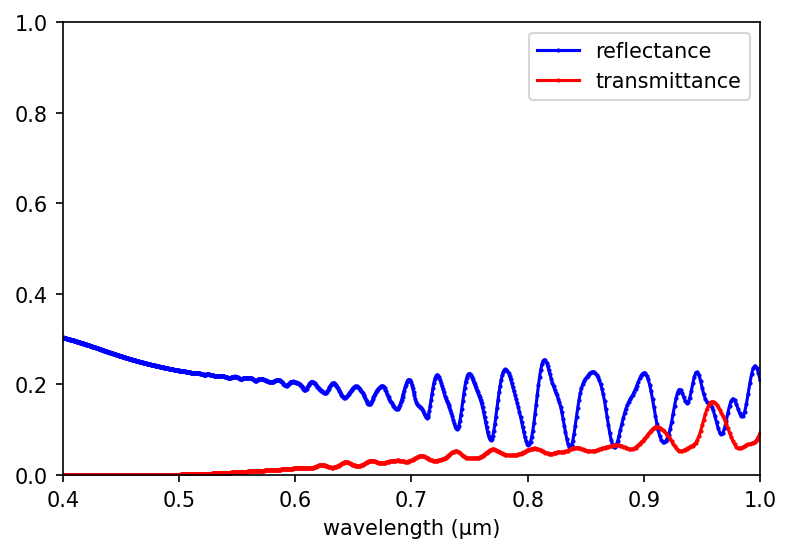

In [15]:
if mp.am_master():
    plt.figure(dpi=150)
    plt.plot(wl,Rs,'bo-',label='reflectance', markersize = 1)
    plt.plot(wl,Ts,'ro-',label='transmittance', markersize = 1)
    #plt.plot(wl,1-Rs-Ts,'go-',label='loss or Absorption', markersize = 1)
    plt.axis([.4, 1.0, 0, 1])
    plt.xlabel("wavelength (μm)")
    plt.legend(loc="upper right")
    plt.show()